# Monte Carlo Simulations with Python (Part 1)
[Patrick Hanbury](https://towardsdatascience.com/monte-carlo-simulations-with-python-part-1-f5627b7d60b0)

- Notebook author: Israel Oliveira [\[e-mail\]](mailto:'Israel%20Oliveira%20'<prof.israel@gmail.com>)

In [1]:
%load_ext watermark

In [129]:
import numpy as np
import math
import random
from matplotlib import pyplot as plt
from IPython.display import clear_output, display, Markdown, Latex, Math
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon

import scipy.integrate as integrate
from decimal import Decimal

import pandas as pd

PI = math.pi
e = math.e

In [3]:
# Run this cell before close.
%watermark
%watermark --iversion
%watermark -b -r -g

2020-06-11T14:41:50+00:00

CPython 3.7.7
IPython 7.15.0

compiler   : GCC 8.3.0
system     : Linux
release    : 4.19.76-linuxkit
machine    : x86_64
processor  : 
CPU cores  : 16
interpreter: 64bit
numpy 1.18.5

Git hash: 65fe9d3ebc619f55a31549efb1f85ee7505089bf
Git repo: https://github.com/ysraell/examples.git
Git branch: master


We want:


$I_{ab} = \int\limits_{a}^{b} f(x) dx ~~~(1)$

so, we could achive that with a avarage value of $f$:

$\hat{f}_{ab} = \frac{1}{b-a} \int\limits_{a}^{b} f(x) dx  ~~~(2)$

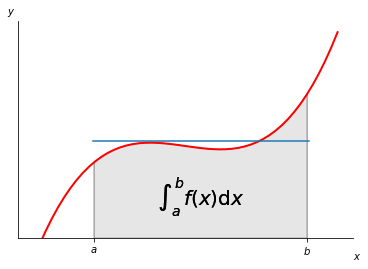

In [17]:

def func(x):
    return (x - 3) * (x - 5) * (x - 7) + 85

a, b = 2, 9  # integral limits
x = np.linspace(0, 10)
y = func(x)

fig, ax = plt.subplots()
ax.plot(x, y, 'r', linewidth=2)
ax.set_ylim(bottom=0)

# Make the shaded region
ix = np.linspace(a, b)
iy = func(ix)
verts = [(a, 0), *zip(ix, iy), (b, 0)]
poly = Polygon(verts, facecolor='0.9', edgecolor='0.5')
ax.add_patch(poly)

ax.text(0.5 * (a + b), 30, r"$\int_a^b f(x)\mathrm{d}x$",
        horizontalalignment='center', fontsize=20)

fig.text(0.9, 0.05, '$x$')
fig.text(0.1, 0.9, '$y$')

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.xaxis.set_ticks_position('bottom')

ax.set_xticks((a, b))
ax.set_xticklabels(('$a$', '$b$'))
ax.set_yticks([])

plt.axhline(90, xmin=0.225, xmax=0.87)
ax.text(0.5 * (a + b), 30, r"$\int_a^b f(x)\mathrm{d}x$",
        horizontalalignment='center', fontsize=20)

plt.show()

With $(1)$ and $(2)$:

$\hat{f}_{ab} = \frac{1}{b-a} I $


$I = (b-a)\hat{f}_{ab}  ~~~(3)$

Sampling $f(\cdot)$, it is possible to calculate a approximate value for $\hat{f}_{ab}$ (with a random variable $\mathbf{x}$):

$\mathbf{F}_{ab} = {f(\mathbf{x}) ~|~ \mathbf{x} ~\in~ [a, b]}$

The expectation for $\mathbf{F}_{ab}$ is:

$E[\mathbf{F}_{ab}] = \hat{f}_{ab}$

and concluding with

$I = E[\mathbf{F}_{ab}](b-a)$

So, how we could calculate $E[\mathbf{F}_{ab}]$? With $N$ uniform sampling of $x~\in~[a, b]$. If $N$ is large enough and $\mathbf{x}$ is uniform between $[a, b]$:

$ E[\mathbf{F}_{ab}] = \frac{1}{N} \sum\limits_{i}^N f(\mathbf{x}) ~|~ \mathbf{x} ~\in~ [a, b]$ 

and

$I = E[\mathbf{F}_{ab}](b-a) = \lim\limits_{N \rightarrow \infty} \frac{b-a}{N} \sum\limits_{i}^N f(\mathbf{x}) ~|~ \mathbf{x} ~\in~ [a, b]  ~~~(4)$


This is the *Crude Monte Carlo*.

#### Example 1:

Calculate:

$I =   \int\limits_{0}^{+\infty} \frac{e^{-x}}{(x-1)^2 + 1} dx  ~~~(5)$

In [81]:
def get_rand_number(min_value, max_value):
    """
    This function gets a random number from a uniform distribution between
    the two input values [min_value, max_value] inclusively
    Args:
    - min_value (float)
    - max_value (float)
    Return:
    - Random number between this range (float)
    """
    range = max_value - min_value
    choice = random.uniform(0,1)
    return min_value + range*choice

def f_of_x(x):
    """
    This is the main function we want to integrate over.
    Args:
    - x (float) : input to function; must be in radians
    Return:
    - output of function f(x) (float)
    """
    return (e**(-1*x))/(1+(x-1)**2)

lower_bound = 0
upper_bound = 5

def crude_monte_carlo(num_samples=10000, lower_bound = 0, upper_bound = 5):
    """
    This function performs the Crude Monte Carlo for our
    specific function f(x) on the range x=0 to x=5.
    Notice that this bound is sufficient because f(x)
    approaches 0 at around PI.
    Args:
    - num_samples (float) : number of samples
    Return:
    - Crude Monte Carlo estimation (float)
    
    """
    sum_of_samples = 0
    for i in range(num_samples):
        x = get_rand_number(lower_bound, upper_bound)
        sum_of_samples += f_of_x(x)
    
    return (upper_bound - lower_bound) * float(sum_of_samples/num_samples)

In [90]:
display(Math(r'I \approx  {:.4f}, ~N = 10^4'.format(crude_monte_carlo())))

<IPython.core.display.Math object>

In [83]:
display(Math(r'\left . f(a) \right |_{a=0} \approx  '+r'{:.4f} '.format(f_of_x(lower_bound))))

<IPython.core.display.Math object>

In [84]:
display(Math(r'\left . f(b) \right |_{b=5} \approx  '+r'{:.4f} '.format(f_of_x(upper_bound))))

<IPython.core.display.Math object>

Why $b=5$?

$ \lim\limits_{x \rightarrow +\infty}  \frac{e^{-x}}{(x-1)^2 + 1}  \rightarrow 0 $

We could consider $0.0004 ~\approx~ 0$.

If $b = 10$?

In [85]:
upper_bound = 10
display(Math(r'\left . f(b) \right |_{b=5} \approx  '+r'{:.6f}'.format(f_of_x(upper_bound))+'= 10^{-6}'))

<IPython.core.display.Math object>

In [91]:
display(Math(r'I \approx  {:.4f}, ~N = 10^5 '.format(crude_monte_carlo(num_samples=100000, upper_bound = 10))))

<IPython.core.display.Math object>

<Figure size 432x288 with 0 Axes>

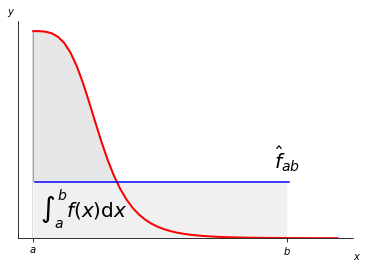

In [19]:
plt.figure()
def func(x):
    return f_of_x(x)

a, b = 0, 5  # integral limits
x = np.linspace(0, 6)
y = func(x)

fig, ax = plt.subplots()
ax.plot(x, y, 'r', linewidth=2)
ax.set_ylim(bottom=0)

# Make the shaded region
ix = np.linspace(a, b)
iy = func(ix)
verts = [(a, 0), *zip(ix, iy), (b, 0)]
poly = Polygon(verts, facecolor='0.9', edgecolor='0.5')
ax.add_patch(poly)

ax.text(0.2 * (a + b), 0.05, r"$\int_a^b f(x)\mathrm{d}x$",
        horizontalalignment='center', fontsize=20)

fig.text(0.9, 0.05, '$x$')
fig.text(0.1, 0.9, '$y$')

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.xaxis.set_ticks_position('bottom')

ax.set_xticks((a, b))
ax.set_xticklabels(('$a$', '$b$'))
ax.set_yticks([])

ax.axhline(0.2*crude_monte_carlo(),color='b', xmin=0.051, xmax=0.81)
iy = iy*0+0.2*crude_monte_carlo()
verts = [(a, 0), *zip(ix, iy), (b, 0)]
poly = Polygon(verts, facecolor='0.94', edgecolor='0.99')
ax.add_patch(poly)
ax.text(5,0.2*crude_monte_carlo()+0.03 , r"$\hat{f}_{ab}$",
        horizontalalignment='center', fontsize=20)

plt.show()

Comparing with [Integration (scipy.integrate)](https://docs.scipy.org/doc/scipy/reference/tutorial/integrate.html).

In [123]:
results = integrate.quad(lambda x: f_of_x(x), lower_bound, upper_bound)

In [124]:
tmp = (Decimal(results[1]).as_tuple().digits[0], Decimal(results[1]).as_tuple().exponent + len(Decimal(results[1]).as_tuple().digits) -1)

display(Math(r'I_{\text{SciPy}} =  '+r'{:.4f}, ~e \approx {}'.format(results[0],tmp[0])+r'\cdot 10^{'+'{}'.format(tmp[1])+r'}'))

<IPython.core.display.Math object>

In [126]:
diff = []
for _ in range(100):
    diff.append(crude_monte_carlo(num_samples=100000, upper_bound = 10)-results[0])

,$I- I_{\text{SciPy}}$
count,100.000000
mean,0.003531
std,0.002643
min,0.000077
25%,0.001455
50%,0.003143
75%,0.004625
max,0.011710


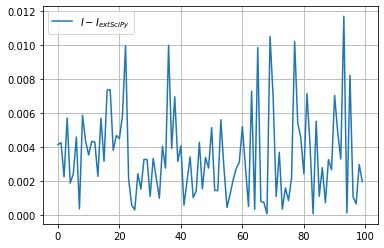

In [138]:
df = pd.DataFrame([abs(x) for x in diff], columns=['$I- I_{\text{SciPy}}$'])
display(df.describe())
df.plot(grid = True)

,$(I- I_{\text{SciPy}})/I_{\text{SciPy}}$
count,100.000000
mean,0.005073
std,0.003797
min,0.000111
25%,0.002091
50%,0.004515
75%,0.006645
max,0.016823


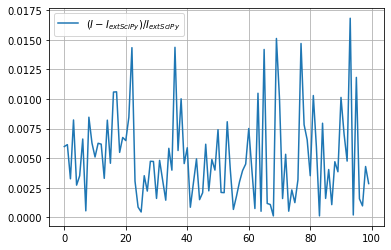

In [144]:
df = pd.DataFrame([abs(x)/results[0] for x in diff], columns=['$(I- I_{\text{SciPy}})/I_{\text{SciPy}}$'])
display(df.describe())
df.plot(grid = True)

Confirm the estimated error with variance.

In [149]:
def get_crude_MC_variance(num_samples =  10000, upper_bound = 5):
    """
    This function returns the variance fo the Crude Monte Carlo.
    Note that the inputed number of samples does not neccissarily
    need to correspond to number of samples used in the Monte
    Carlo Simulation.
    Args:
    - num_samples (int)
    Return:
    - Variance for Crude Monte Carlo approximation of f(x) (float)
    """
    int_max = upper_bound # this is the max of our integration range
    
    # get the average of squares
    running_total = 0
    for i in range(num_samples):
        x = get_rand_number(0, int_max)
        running_total += f_of_x(x)**2
    sum_of_sqs = running_total*int_max / num_samples
    
    # get square of average
    running_total = 0
    for i in range(num_samples):
        x = get_rand_number(0, int_max)
        running_total = f_of_x(x)
    sq_ave = (int_max*running_total/num_samples)**2
    
    return sum_of_sqs - sq_ave

In [164]:
s1 = get_crude_MC_variance()
"{:.4f}".format(s1)

'0.2625'

In [165]:
s2 = get_crude_MC_variance(100000,10)
"{:.4f}".format(s2)

'0.2631'

In [168]:
math.sqrt(s1 / 10000)

0.005123025449907512

In [171]:
df.describe().loc['mean'].to_list()[0]

0.00507258217772572

### Importance Sampling

In [172]:
# this is the template of our weight function g(x)
def g_of_x(x, A, lamda):
    e = 2.71828
    return A*math.pow(e, -1*lamda*x)

def inverse_G_of_r(r, lamda):
    return (-1 * math.log(float(r)))/lamda

def get_IS_variance(lamda, num_samples):
    """
    This function calculates the variance if a Monte Carlo
    using importance sampling.
    Args:
    - lamda (float) : lamdba value of g(x) being tested
    Return: 
    - Variance
    """
    A = lamda
    int_max = 5
    
    # get sum of squares
    running_total = 0
    for i in range(num_samples):
        x = get_rand_number(0, int_max)
        running_total += (f_of_x(x)/g_of_x(x, A, lamda))**2
    
    sum_of_sqs = running_total / num_samples
    
    # get squared average
    running_total = 0
    for i in range(num_samples):
        x = get_rand_number(0, int_max)
        running_total += f_of_x(x)/g_of_x(x, A, lamda)
    sq_ave = (running_total/num_samples)**2
    
    
    return sum_of_sqs - sq_ave

# get variance as a function of lambda by testing many
# different lambdas

test_lamdas = [i*0.05 for i in range(1, 61)]
variances = []

for i, lamda in enumerate(test_lamdas):
    print(f"lambda {i+1}/{len(test_lamdas)}: {lamda}")
    A = lamda
    variances.append(get_IS_variance(lamda, 10000))
    clear_output(wait=True)
    
optimal_lamda = test_lamdas[np.argmin(np.asarray(variances))]
IS_variance = variances[np.argmin(np.asarray(variances))]

print(f"Optimal Lambda: {optimal_lamda}")
print(f"Optimal Variance: {IS_variance}")
print(f"Error: {(IS_variance/10000)**0.5}")

Optimal Lambda: 1.6500000000000001
Optimal Variance: 0.04850338057561787
Error: 0.0022023483052328


In [173]:
def importance_sampling_MC(lamda, num_samples):
    A = lamda
    
    running_total = 0
    for i in range(num_samples):
        r = get_rand_number(0,1)
        running_total += f_of_x(inverse_G_of_r(r, lamda=lamda))/g_of_x(inverse_G_of_r(r, lamda=lamda), A, lamda)
    approximation = float(running_total/num_samples)
    return approximation

# run simulation
num_samples = 10000
approx = importance_sampling_MC(optimal_lamda, num_samples)
variance = get_IS_variance(optimal_lamda, num_samples)
error = (variance/num_samples)**0.5

# display results
print(f"Importance Sampling Approximation: {approx}")
print(f"Variance: {variance}")
print(f"Error: {error}")

Importance Sampling Approximation: 0.6953260856002619
Variance: 0.04570462290582866
Error: 0.0021378639551156817


In [181]:
display(Math(r'(I_{IS} - I_{\text{SciPy}})/I_{\text{SciPy}} = '+'{:.4}\%'.format(100*abs((approx-results[0])/results[0]))))

<IPython.core.display.Math object>